In [126]:
# import block 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for plotting AUC
import textwrap


# normalize
from sklearn.preprocessing import MinMaxScaler


# ETC 
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split

# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# random forest
from sklearn.ensemble import RandomForestClassifier

# ada boost
from sklearn.ensemble import AdaBoostClassifier

# stack multiple classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [87]:
# load files
# import shape files 
# Download the corresponding shape files for four DNA shape features
# Minor Groove Width, Propeller Twist, Roll, Helical Twist

# Import Bound
file_path = '/Users/peytonhall/downloads/ctcf/ctcf_bound.HelT'
boundHel = pd.read_csv(file_path, sep='\t', header=None)
boundHel = boundHel[0].str.split(" ", expand=True)
boundHel = boundHel.apply(pd.to_numeric)
boundHel

file_path = '/Users/peytonhall/downloads/ctcf/ctcf_bound.MGW'
boundMGW = pd.read_csv(file_path, sep='\t', header=None)
boundMGW = boundMGW[0].str.split(" ", expand=True)
boundMGW = boundMGW.apply(pd.to_numeric)
boundMGW

file_path = '/Users/peytonhall/downloads/ctcf/ctcf_bound.ProT'
boundPro = pd.read_csv(file_path, sep='\t', header=None)
boundPro = boundPro[0].str.split(" ", expand=True)
boundPro = boundPro.apply(pd.to_numeric)
boundPro

file_path = '/Users/peytonhall/downloads/ctcf/ctcf_bound.Roll'
boundRoll = pd.read_csv(file_path, sep='\t', header=None)
boundRoll = boundRoll[0].str.split(" ", expand=True)
boundRoll = boundRoll.apply(pd.to_numeric)
boundRoll

# Import Unbound
file_path = '/Users/peytonhall/downloads/ctcf/ctcf_unbound.HelT'
unboundHel = pd.read_csv(file_path, sep='\t', header=None)
unboundHel = unboundHel[0].str.split(" ", expand=True)
unboundHel = unboundHel.apply(pd.to_numeric)
unboundHel

file_path = '/Users/peytonhall/downloads/ctcf/ctcf_unbound.MGW'
unboundMGW = pd.read_csv(file_path, sep='\t', header=None)
unboundMGW = unboundMGW[0].str.split(" ", expand=True)
unboundMGW = unboundMGW.apply(pd.to_numeric)
unboundMGW

file_path = '/Users/peytonhall/downloads/ctcf/ctcf_unbound.ProT'
unboundPro = pd.read_csv(file_path, sep='\t', header=None)
unboundPro = unboundPro[0].str.split(" ", expand=True)
unboundPro = unboundPro.apply(pd.to_numeric)
unboundPro

file_path = '/Users/peytonhall/downloads/ctcf/ctcf_unbound.Roll'
unboundRoll = pd.read_csv(file_path, sep='\t', header=None)
unboundRoll = unboundRoll[0].str.split(" ", expand=True)
unboundRoll = unboundRoll.apply(pd.to_numeric)
unboundRoll

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-2.138866,-1.188803,8.144425,-3.594348,-1.857451,6.803225,-0.611546,-2.271277,-0.679316,2.357328,...,1.939955,-0.891714,-3.793289,-3.715151,-3.074820,2.972331,-1.409185,-2.017498,4.231595,-2.051757
1,-1.302453,-0.268893,-3.940038,-3.939700,-3.015928,-4.588016,-2.779263,-1.039200,-2.007505,2.045589,...,-3.643554,-2.861020,-0.502418,2.454390,-1.127386,4.390614,-2.874587,-4.188812,7.345188,-2.858780
2,-0.599531,-4.394622,-1.070906,4.988440,-4.006577,3.526304,-1.787354,-2.079422,-1.477624,2.200573,...,-1.007394,-3.901558,-3.668811,5.711183,-5.205194,-2.060240,6.222474,-2.413164,3.972157,-1.768682
3,4.019381,-0.192562,-4.753694,-2.149995,-0.837322,6.614321,-2.326235,-1.738418,-1.875802,2.850543,...,-2.238098,-2.130540,-2.812258,3.697177,-2.020011,6.100336,-2.466852,-2.647687,-3.007220,-2.114107
4,1.232321,-2.421489,-7.016572,-2.424993,-1.620575,-2.987259,3.488762,-2.473886,-0.756519,2.728051,...,1.379277,-1.750595,-1.580441,-1.955026,-1.489836,1.836110,-1.679136,-1.077042,-0.993061,-4.121867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-4.596695,-3.388017,-1.148492,-1.454612,-2.092157,-1.830902,1.591822,-1.716677,-1.213729,2.552442,...,3.374193,-2.423626,-1.170169,4.213751,-2.806761,-2.416383,-0.749644,-1.886643,-2.492170,5.000802
1996,-1.952929,3.597276,-0.659843,-2.456631,3.297228,-2.844787,-1.933930,-2.578702,-1.987648,3.693495,...,5.058935,-0.005732,-3.783879,3.356137,-1.896326,-2.083890,3.185255,-2.864871,-1.486886,-0.007294
1997,-1.890534,-1.500420,-1.703959,2.043182,-2.095430,-1.749877,-2.046567,3.445784,-0.961530,3.389671,...,3.501926,-1.894808,-0.730937,-5.563169,-2.478316,5.558130,-2.429001,3.562737,-2.110448,-0.875049
1998,-1.969470,-1.877403,-2.659123,-2.582295,-1.189514,4.403155,-0.844865,-1.530300,3.505199,-1.379821,...,4.869134,-0.381406,-4.299625,5.046129,-1.478917,-1.756180,-1.437251,-2.640308,-2.548122,-1.925925


In [88]:
# import sequences
# DNA sequences that bind to CTCF
file_path = '/Users/peytonhall/downloads/ctcf/ctcf_bound_sequence.txt'
seqBound = pd.read_csv(file_path, sep='\t', header=None)
seqBound
# label as y = 1

# DNA sequences that DO NOT bind to CTCF
file_path = '/Users/peytonhall/downloads/ctcf/ctcf_unbound_sequence.txt'
seqUnbound = pd.read_csv(file_path, sep='\t', header=None)
seqUnbound
# label as y = 0

,0
0,TTTATTGACCACCTAGAAGCGGTTTGGCGT
1,GGAAGGTCCCACCAGGCGGAACCGCAATAT
2,GATCATGGCCACCTGGGGGGAACATTACGC
3,TGATTTAGGCACTAGAGGGCCCTGTAAGCC
4,AAATCCTACCACTTGAGGGCGGGCCGGGAT
...,...
1995,ATTCCCCGCCACCAGCTGGCGTCAGGGACA
1996,GTGGTAGGCCATCAGAGGTCGATGGCGTCT
1997,GGGCGCCTGCAGCAGGTGACAGATTACGCT
1998,GGGCTCGGCGAGTCGTTTGCGATGAGAGCC


In [89]:
# combine bound and unbound to get 4 shape features
# shape is (4000, 29)
shapeHel = np.vstack((boundHel, unboundHel))
shapeRoll = np.vstack((boundRoll, unboundRoll))

# shape is (4000, 30)
shapeMGW = np.vstack((boundMGW, unboundMGW))
shapePro = np.vstack((boundPro, unboundPro))

In [90]:
# make min-max normalization function
def normalizationFunct(shape):
    minShape = np.min(shape, axis=0)  # Minimum for each column
    maxShape = np.max(shape, axis=0)  # Maximum for each column
    y = (shape - minShape) / (maxShape - minShape)
    return y

In [91]:
# normalize each feature to scale them from 0 to 1
# shape is (4000, 29)
normalHel = normalizationFunct(shapeHel)
normalRoll = normalizationFunct(shapeRoll)

# shape is (4000, 30)
normalMGW = normalizationFunct(shapeMGW)
normalPro = normalizationFunct(shapePro)

In [92]:
# check normal output
print(shapeHel.shape)
print(shapeHel)

print(normalHel.shape)
print(normalHel)

(4000, 29)
[[32.299187 33.76005  33.494972 ... 35.126404 34.64012  33.768417]
 [33.414623 34.59502  32.295177 ... 33.423203 36.39585  33.108578]
 [34.252808 36.297737 31.832935 ... 34.825424 32.92126  36.794247]
 ...
 [33.01091  33.6706   36.223522 ... 33.030476 37.342247 31.655994]
 [33.029263 33.364998 36.81955  ... 31.570007 37.009323 32.886414]
 [33.908745 31.806595 34.868828 ... 32.158882 33.550858 33.78866 ]]
(4000, 29)
[[0.28166696 0.36811179 0.34750952 ... 0.5807083  0.49665097 0.45141518]
 [0.40794706 0.47243693 0.19588156 ... 0.35382033 0.72087684 0.37614451]
 [0.50283917 0.68518252 0.13746424 ... 0.54061395 0.27713381 0.79658464]
 ...
 [0.36224213 0.35693548 0.6923388  ... 0.30150412 0.84174205 0.210442  ]
 [0.3643199  0.31875211 0.76766376 ... 0.10695113 0.79922403 0.3508013 ]
 [0.46388731 0.1240378  0.52113499 ... 0.18539675 0.35754034 0.45372439]]


In [93]:
# combine all 4 normalized features into an array
# shape is (4000, 118)
normalShape = np.hstack((normalHel, normalRoll, normalMGW, normalPro))

In [94]:
# make one hot encode function for sequences
def encodeMono(sequence):
    monoMap = {"A": [1, 0, 0, 0], "C": [0, 1, 0, 0], "G": [0, 0, 1, 0], "T": [0, 0, 0, 1]}
    encoded = []
    for mononucleotide in sequence:
        encoded.extend(monoMap[mononucleotide])
    return encoded

In [95]:
# encode bound
# apply encoding function to bound sequence
# shape is (2000, 120)
preBound = seqBound[0].tolist()
encodeBound = np.array([encodeMono(seq) for seq in preBound])

# apply encoding function to unbound sequence
# shape is (2000, 120)
preUnBound = seqUnbound[0].tolist()
encodeUnBound = np.array([encodeMono(seq) for seq in preUnBound])

In [96]:
# shape is (4000, 120)
monoMer = np.vstack((encodeBound, encodeUnBound))

In [97]:
# Combine the one-hot encoded DNA sequences (1mer) with the normalized shape features (1mer+shape) for the CTCF bound and unbound datasets.
# shape is (4000, 238)
xVar = np.hstack((monoMer, normalShape))

In [98]:
# make y var for model
boundYLab = [1] * 2000
boundYLab = np.array(boundYLab)
unBoundYLab = [0] * 2000
unBoundYLab = np.array(unBoundYLab)

totalYLab = np.hstack((boundYLab, unBoundYLab))

In [99]:
#Part 2: Overfitting in Decision Trees vs. Random Forests

In [100]:
def decisionTreeClassifier(X, y, maxDepths):
    # Initialize lists to store metrics
    decisionTrainAccuracy = []
    decisionTestAccuracy = []
    
    # Split training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    for depth in maxDepths:
        # Create the DecisionTreeClassifier object with max_depth
        clf = DecisionTreeClassifier(max_depth=depth, random_state=1)

        # Train classifier
        clf.fit(X_train, y_train)

        # training accuracy
        dtTrainPred = clf.predict(X_train)
        dtTestPred = clf.predict(X_test)
        
        
        decisionTrainAccuracy.append(metrics.accuracy_score(y_train, dtTrainPred))
        decisionTestAccuracy.append(metrics.accuracy_score(y_test, dtTestPred))
    
    return decisionTrainAccuracy, decisionTestAccuracy

In [101]:
print(decisionTrainAccuracy)
print(decisionTestAccuracy)

[0.6896875, 0.75625, 0.76625, 0.8096875, 0.8321875, 0.873125, 0.9084375, 0.940625, 0.9615625, 0.9753125, 0.9803125, 0.9875, 0.9934375, 0.9959375, 0.9978125, 0.9984375, 0.9990625, 0.9996875, 1.0, 1.0]
[0.70875, 0.73875, 0.76375, 0.78125, 0.78625, 0.78125, 0.77875, 0.75375, 0.755, 0.745, 0.7475, 0.7475, 0.745, 0.735, 0.7425, 0.7375, 0.74, 0.74, 0.7375, 0.7375]


In [102]:
def randomForestClassifier(X, y, maxDepths, n_estimators=100):
    # Initialize lists to store metrics
    randomTrainAccuracy = []
    randomTestAccuracy = []
    
    # Split training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    for depth in maxDepths:
        # Create the DecisionTreeClassifier object with max_depth
        clf = RandomForestClassifier(max_depth=depth, n_estimators=n_estimators, random_state=1)

        # Train classifier
        clf.fit(X_train, y_train)

        # training accuracy
        rfTrainPred = clf.predict(X_train)
        rfTestPred = clf.predict(X_test)
        
        
        randomTrainAccuracy.append(metrics.accuracy_score(y_train, rfTrainPred))
        randomTestAccuracy.append(metrics.accuracy_score(y_test, rfTestPred))

    return randomTrainAccuracy, randomTestAccuracy

In [103]:
print(randomTrainAccuracy)
print(randomTestAccuracy)

[0.8328125, 0.84875, 0.8575, 0.873125, 0.885, 0.91375, 0.93875, 0.9671875, 0.9815625, 0.9896875, 0.99375, 0.9959375, 0.9975, 0.998125, 0.99875, 0.999375, 1.0, 1.0, 1.0, 1.0]
[0.84, 0.8475, 0.8475, 0.85125, 0.8525, 0.8475, 0.85375, 0.84625, 0.85625, 0.845, 0.84875, 0.85375, 0.84125, 0.845, 0.84875, 0.84125, 0.84375, 0.845, 0.84875, 0.84625]


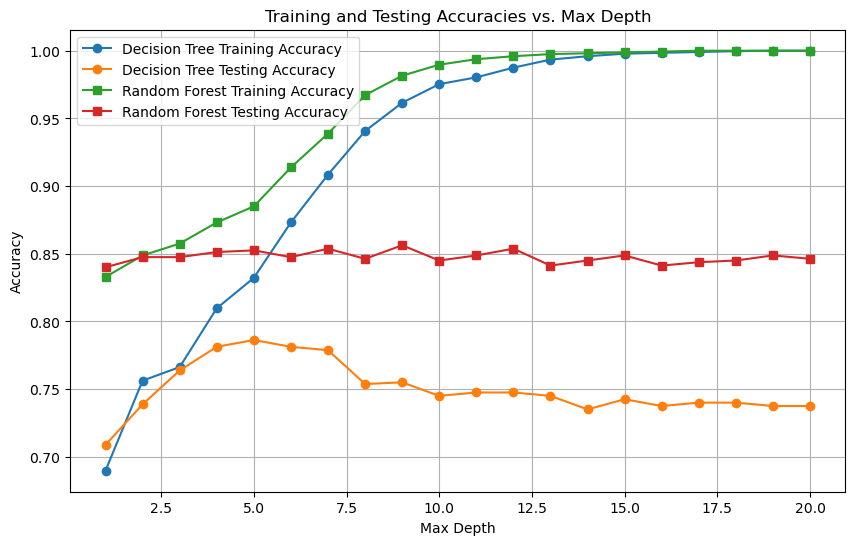

In [104]:
import matplotlib.pyplot as plt

def compareClassifiers(X, y, maxDepths, n_estimators=100):
    # Get accuracies from both classifiers
    decisionTrainAccuracy, decisionTestAccuracy = decisionTreeClassifier(X, y, maxDepths)
    randomTrainAccuracy, randomTestAccuracy = randomForestClassifier(X, y, maxDepths, n_estimators)

    # Plot the accuracies
    plt.figure(figsize=(10, 6))
    plt.plot(maxDepths, decisionTrainAccuracy, label='Decision Tree Training Accuracy', marker='o')
    plt.plot(maxDepths, decisionTestAccuracy, label='Decision Tree Testing Accuracy', marker='o')
    plt.plot(maxDepths, randomTrainAccuracy, label='Random Forest Training Accuracy', marker='s')
    plt.plot(maxDepths, randomTestAccuracy, label='Random Forest Testing Accuracy', marker='s')
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.title('Training and Testing Accuracies vs. Max Depth')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
maxDepths = range(1, 21)
compareClassifiers(xVar, totalYLab, maxDepths)

In [ ]:
'''
I found that overall, random forest performed better since the training
accuracy was higher at a more shallow depth than decision tree and the 
testing accuracy was consistently higher than the accuracy of decision
tree. 

Across both classifiers, I observed that training accuracy
was significantly higher than testing accuracy, increasing with max depth. 

This disparity between training and testing performance is likely due
to overfitting. 

I also observed that unlike the training accuracies which had a positive 
relationship with tree depth, max depth for the optimal decision tree testing
accuracy was around 5. For the random forest classifier, testing accuracy
did not really seem to have a relationship with max depth, staying 
pretty consistent across most depths. 
'''

In [82]:
# Part 3: Hyperparameter Tuning with AdaBoost

In [122]:
# define hyperparameter grid for adaboost
# dictionary
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

In [123]:
# define hyperparameter grid for adaboost
# dictionary
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# make function for adaBoost
def adaClassifier(X, y, param_grid, cv=5):
    # Split into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # initialize AdaBoost
    ada = AdaBoostClassifier(random_state=1)
    # grid search with cross validation of 5
    grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # evaluate model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)

    # print best hyperparameters
    print("Best Hyperparameters:", grid_search.best_params_)
    # print accuracy
    print("Test Accuracy:", accuracy)

    # visualize with heat map
    results = pd.DataFrame(grid_search.cv_results_)
    heatmap_data = results.pivot(index="param_n_estimators", columns="param_learning_rate", values="mean_test_score")

    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data)
    plt.title("Mean Cross-Validated Score for AdaBoost Hyperparameters")
    plt.xlabel("Learning Rate")
    plt.ylabel("Number of Estimators")
    
    plt.savefig("/Users/peytonhall/downloads/adaboost_heatmap.png")
    plt.show()

    return best_model, accuracy

Best Hyperparameters: {'learning_rate': 0.5, 'n_estimators': 150}
Test Accuracy: 0.865


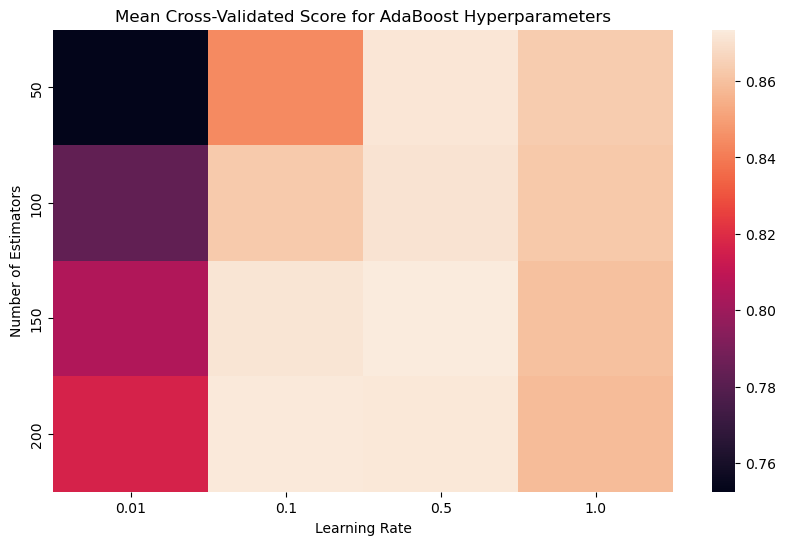

In [124]:
best_model, test_accuracy = adaClassifier(xVar, totalYLab, param_grid)

In [ ]:
'''
Evalutation:
The best hyperparameters seemed to be a learning_rate of 0.5 and 
n_estimators of 150. 

The accuracy was 0.865

Visualization: 
From the heatmap, it seems that a learning rate of 0.5 performed
best overall across various n_estimators, but that from this, 150
estimators performed the best with an accuracy above 0.86. 

The hyperparameter combination of a 0.1 learning rate with 150-200 
estimators also performed with a high accuracy. 

A learning rate of 0.01 performed the worst, especially in combination
with estimator values of 50, 100.  

Overall, it seems higher estimator values and moderate learning
rates perform better.

'''

In [ ]:
# Part 4: Stacking Multiple Classifiers

In [127]:
# base learners
    # Logistic Regression (LogisticRegression)
    # Naive Bayes (GaussianNB)
    # k-Nearest Neighbors (KNeighborsClassifier)
    # Random Forest (RandomForestClassifier)
    # AdaBoost (AdaBoostClassifier)

baseLearners = [
    ('logistic', LogisticRegression(random_state=1)),
    ('naive_bayes', GaussianNB()),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('random_forest', RandomForestClassifier(random_state=1)),
    ('adaboost', AdaBoostClassifier(random_state=1))
]

In [ ]:
# meta-learner
metaLearner = LogisticRegression(max_iter=1000, random_state=1)

In [162]:
# implement stacking

# function: Stacking Classifier
# parameters: x and y
# returns stacking ensemble and accuracy
def stackingClassifier(X, y):
    # split into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # make stacking ensemble
    stackingModel = StackingClassifier(estimators=baseLearners, final_estimator=metaLearner)
    
    # train model
    stackingModel.fit(X_train, y_train)

    # evaluate model
    y_pred = stackingModel.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    print("Stacking Ensemble Test Accuracy:", accuracy)

    return stackingModel, accuracy

In [163]:
# evaluation for test data
def evaluateModels(X_train, X_test, y_train, y_test):
    results = {}
    for name, model in baseLearners:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        results[name] = accuracy
    return results

In [164]:
X, y = xVar, totalYLab  

# split data with random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# train classifier
stackingModel, stackingAccuracy = stackingClassifier(X, y)

# evaluate individual models
individualResults = evaluateModels(X_train, X_test, y_train, y_test)

# make dataframe
comparisonDf = pd.DataFrame(list(individualResults.items()), columns=['Model', 'Test Accuracy'])
comparisonDf = pd.concat([comparisonDf, pd.DataFrame({'Model': ['Stacking Ensemble'], 'Test Accuracy': [stackingAccuracy]})], ignore_index=True)

print(comparisonDf)


/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Stacking Ensemble Test Accuracy: 0.87125


/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               Model  Test Accuracy
0           logistic        0.86250
1        naive_bayes        0.87375
2                knn        0.67500
3      random_forest        0.84500
4           adaboost        0.85750
5  Stacking Ensemble        0.87125


In [ ]:
'''
Evaluation:
Stacking Ensemble Test Accuracy: 0.87125

Comparison with Individual Models:
               Model  Test Accuracy
0           logistic        0.86250
1        naive_bayes        0.87375
2                knn        0.67500
3      random_forest        0.84500
4           adaboost        0.85750
5  Stacking Ensemble        0.87125


# naive bayes performed the best, knn performed the worst. the accuracies
of adaboost and random forest seemed consistent with previous findings

'''